In [83]:
rho=[1,1.05,0.897]  #densidades: H2O, acido acet., acetato
mu= [18.0153, 60.0520,88.1051]  #molar mass: H2O, acido acet., acetato

volum=[[0.4,0,5],
       [1,0.85,9], #volumenes: H2O, acido acet., acetato
       [2,3.10-0.85,8], 
       [3,5.60-3.1,7], 
       [4,8.25-5.6,6], 
       [5,2.6,5],
       [6,2.8,4],
       [7,2.3,3],
       [8,1.9,2],
       [9,0.6,1],
       [5,0,0.7]]
       
def fracmol(volum):
    fracmol=[]
    for j in range(len(volum)):
        n_i=[rho[i]*volum[j][i]/mu[i] for i in range(len(rho))]
        fracmol.append([n_i[e]*100/sum(n_i) for e in range(len(n_i))])
    return fracmol

def porcmass(volum):
    ans=[]
    for j in range(len(volum)):
        m_i=[rho[i]*volum[j][i] for i in range(len(rho))]
        ans.append([m_i[e]*100/sum(m_i) for e in range(len(m_i))])
    return ans

pmass=porcmass(volum)
pmass

[[8.18833162743091, 0.0, 91.81166837256909],
 [10.034619437057849, 8.95589784757413, 81.00948271536802],
 [17.333275555748145, 20.4749317502275, 62.19179269402435],
 [25.201612903225808, 22.051411290322577, 52.74697580645161],
 [32.88256812857084, 22.873936454437096, 44.24349541699206],
 [40.93327875562833, 22.34957020057307, 36.717151043798616],
 [47.89272030651342, 23.467432950191572, 28.639846743295024],
 [57.822567321989105, 19.948785726086243, 22.228646951924667],
 [67.85986936975146, 16.922554924081773, 15.217575706166766],
 [85.49444286121401, 5.984611000284981, 8.520946138500998],
 [88.84308534266778, 0.0, 11.15691465733222]]

In [90]:
Mnaoh=0.795
Vnaoh=[11.6,12,13.5,13.3] #no.1 acuosa, organica; no.3 ac., org.
merlen2=[72.8436,83.5337,87.0646,86.8628]
merlen1=[67.8578,78.9159,82.0732,82.2109]
def porcacid(Vnaoh):
    mtot=[merlen2[i]-merlen1[i] for i in range(len(merlen2))]
    m_acid=[Mnaoh*Vnaoh[i]*mu[1]/1000 for i in range(len(Vnaoh))]
    return [m_acid[e]*100/mtot[e] for e in range(len(mtot))]
pacid=porcacid(Vnaoh)

Venlac=[[20,4,15],
        [20,5,17]]
porcmass(Venlac)

[[53.113796308591155, 11.153897224804142, 35.7323064666047],
 [49.38393540581249, 12.963283044025777, 37.652781550161734]]

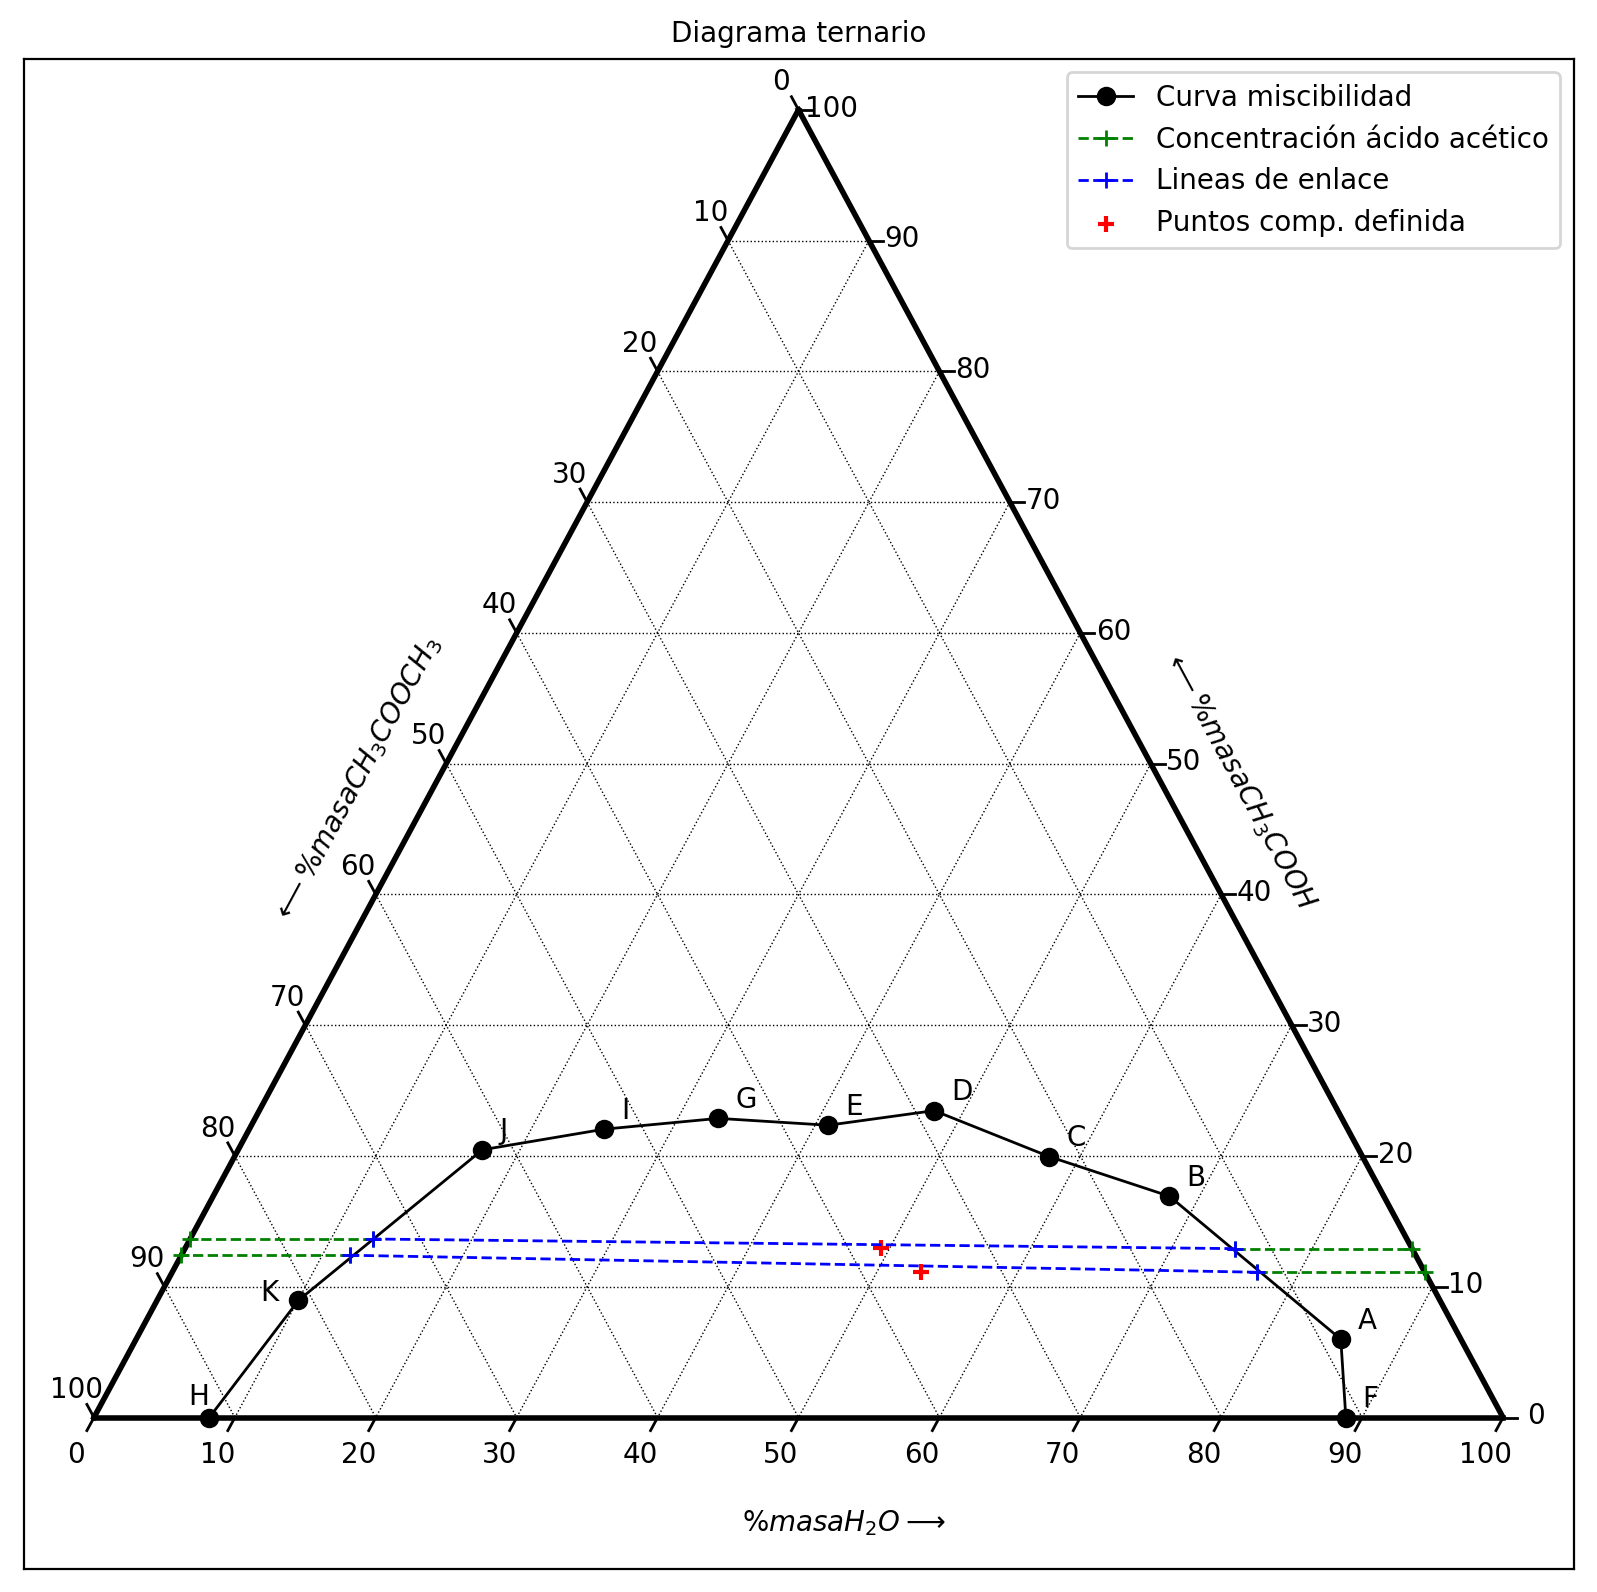

In [85]:
import ternary
import matplotlib.pylab as plt

scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)
figure.set_dpi(200)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color="black", multiple=10)

# Set Axis labels and Title
tax.set_title('Diagrama ternario', fontsize=10)
tax.left_axis_label('$\\longleftarrow \% masa  CH_3COOCH_3 $', fontsize=10)
tax.right_axis_label('$\\longleftarrow \% masa  CH_3COOH $', fontsize=10)
plt.text(46,-7.5,'$\% masa H_2O \\longrightarrow$',fontsize=10)

p1 = [12,10,70]
p2 = [2, 26, 2]
p3=[30,0,70]
p=[p3]
tax.ticks(axis='lbr', multiple=10, linewidth=1)
tax.clear_matplotlib_ticks()
tax.plot(porcmass(volum), marker='o', color='black',linewidth=1.0, label='Curva miscibilidad')
tax.scatter(porcmass(Venlac),marker='+',color='r',label='Puntos comp. definida')
#Nombra puntos
coordtext=[]
texts={0:'H',1:'K',2:'J',3:'I',4:'G',5:'E',6:'D',7:'C',8:'B',9:'A',10:'F'}
for i in range(len(pmass)):
    if i==0:
        coordtext.append([pmass[i][0]-2,pmass[i][1]+1,pmass[i][2]])
    elif i==1:
        coordtext.append([pmass[i][0]-2.7,pmass[i][1],pmass[i][2]])
    else:
        coordtext.append([pmass[i][e]+0.8 for e in range(len(pmass[i]))])
        
for e in range(len(volum)):
    tax.annotate(texts[e],position=coordtext[e])
    
#Lineas de enlace
pointa=[(77,pacid[0],10.0),
        (12,pacid[1],10.0),
        (74.5,pacid[2],10.0),
        (13,pacid[3],10.0)]

for e in range(len(pacid)):
    if e==0:
        tax.line(pointa[e], (100-pacid[e],pacid[e]), linewidth=1., marker='+', color='green', linestyle="--",label='Concentración ácido acético')
    elif e==2:
        tax.line(pointa[e], (100-pacid[e],pacid[e]), linewidth=1., marker='+', color='green', linestyle="--")
    else:
        tax.line(pointa[e], (0,pacid[e],0), linewidth=1., marker='+', color='green', linestyle="--")

tax.line(pointa[0], pointa[1], linewidth=1., marker='+', color='blue', linestyle="--",label='Lineas de enlace')
tax.line(pointa[2], pointa[3], linewidth=1., marker='+', color='blue', linestyle="--")
tax.legend()
tax.savefig('Diag-ternario')
tax.show()

In [92]:
a=77-12
b=53.11-12
b/a

0.6324615384615384